# Analyzing IMDB Data in Keras

In [21]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train_tok = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test_tok = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train_tok[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [5]:
print(x_train_tok.shape)

(25000, 1000)


And we'll also one-hot encode the output.

In [6]:
# One-hot encoding the output
num_classes = 2
y_train_tok = keras.utils.to_categorical(y_train, num_classes)
y_test_tok = keras.utils.to_categorical(y_test, num_classes)
print(y_train_tok.shape)
print(y_test_tok.shape)

(25000, 2)
(25000, 2)


In [7]:
y_train_tok = y_train_tok[:, 1]
y_test_tok = y_test_tok[:, 1]

In [8]:
print(y_train_tok.shape)
print(y_test_tok.shape)

(25000,)
(25000,)


In [9]:
y_train_tok = np.reshape(y_train_tok, (y_train_tok.shape[0], 1))
y_test_tok = np.reshape(y_test_tok, (y_test_tok.shape[0], 1))

In [10]:
y_train_tok

array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 1.],
       [ 0.]])

## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [ ]:
## Here the optimizers are defined.
adam = Adam(lr=0.00005)
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
def construct_model(optimizer=adam):
    model = Sequential()
    model.add(Dense(units = 1000, kernel_initializer = 'uniform', activation='relu', 
                    input_dim=1000))
    model.add(Dropout(0.5))
    model.add(Dense(units = 500, kernel_initializer = 'uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='sigmoid'))
    # to compile the model using a loss function and an optimizer.
    model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model


In [25]:
model = construct_model(optimizer=sgd)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_41 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_42 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 501       
Total params: 1,502,001
Trainable params: 1,502,001
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [26]:
checkpointer = ModelCheckpoint('./weights.hdf5', monitor='val_acc', verbose=1,
                               save_best_only=True, mode='max')

hist = model.fit(x_train_tok, y_train_tok,
                 batch_size=32,
                 epochs=15,
                 validation_data=(x_test_tok, y_test_tok),
                 callbacks=[checkpointer],
                 verbose=0)


Epoch 00000: val_acc improved from -inf to 0.84340, saving model to ./weights.hdf5
Epoch 00001: val_acc improved from 0.84340 to 0.85508, saving model to ./weights.hdf5
Epoch 00002: val_acc improved from 0.85508 to 0.85808, saving model to ./weights.hdf5
Epoch 00003: val_acc improved from 0.85808 to 0.85820, saving model to ./weights.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc improved from 0.85820 to 0.85888, saving model to ./weights.hdf5
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve


In [28]:
def plot_history(hist, title=''):
    ##
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title(title)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    ##
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title(title)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.yscale('log')
    plt.show()
    ##
    return

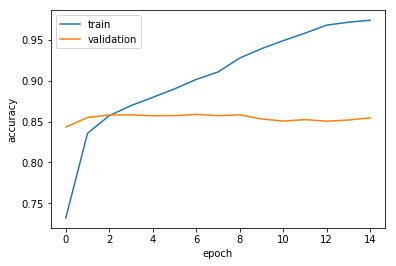

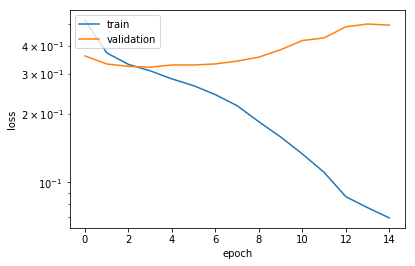

In [29]:
plot_history(hist=hist)

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [14]:
def evaluate_model(model_builder=construct_model, optimizer=sgd, weights='weights.hdf5',
                  x_val=x_test_tok, y_val=y_test_tok):
    ##
    model = model_builder(optimizer=optimizer)
    model.load_weights(weights)
    score = model.evaluate(x_val, y_val, verbose=0)
    ##
    return print("Accuracy: ", score[1])
    

In [36]:
evaluate_model()

Accuracy:  0.86092


## 7. Changing Optimizer
Here we change the optimizer to adam.

In [22]:
model_2 = construct_model(optimizer=adam)


In [23]:
checkpointer = ModelCheckpoint('./weights_2.hdf5', monitor='val_acc', verbose=1,
                               save_best_only=True, mode='max')

hist_2 = model_2.fit(x_train_tok, y_train_tok,
                 batch_size=32,
                 epochs=15,
                 validation_data=(x_test_tok, y_test_tok),
                 callbacks=[checkpointer],
                 verbose=0)

Epoch 00000: val_acc improved from -inf to 0.85384, saving model to ./weights_2.hdf5
Epoch 00001: val_acc improved from 0.85384 to 0.86208, saving model to ./weights_2.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve


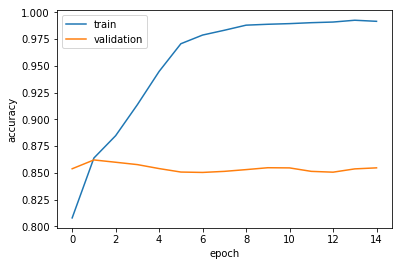

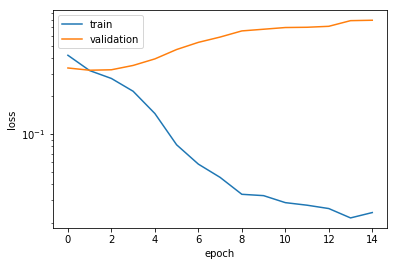

In [26]:
plot_history(hist=hist_2)

In [37]:
evaluate_model(model_builder=construct_model, optimizer=adam, weights='weights_2.hdf5')

Accuracy:  0.86208


## 8. k-Fold Cross-Validation

In [33]:
x_total = np.concatenate((x_train_tok, x_test_tok), axis=0)
y_total = np.concatenate((y_train_tok, y_test_tok), axis=0)

In [34]:
# to wrap the keras model in KerasClassifier so it can be used by scikit-learn
neural_net = KerasClassifier(build_fn=construct_model, 
                             epochs=2, 
                             batch_size=50, 
                             verbose=0)

In [17]:
scores = cross_val_score(neural_net, x_total, y_total, cv=20)

In [18]:
scores

array([ 0.8624    ,  0.86839999,  0.8652    ,  0.8696    ,  0.86199999,
        0.86119999,  0.85759999,  0.8752    ,  0.87719999,  0.86559999,
        0.86919999,  0.8788    ,  0.87879999,  0.86839999,  0.86199999,
        0.86159999,  0.86479999,  0.8588    ,  0.87279999,  0.86039999])

## 9. Grid-Search

In [70]:
checkpointer = ModelCheckpoint('./weights_3.hdf5', monitor='loss', verbose=1,
                               save_best_only=True, mode='min')

classifier = KerasClassifier(build_fn = construct_model)

parameters = {'batch_size': [60, 75, 90],
              'epochs': [2, 3, 4],
              'optimizer':[adam]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           fit_params={'callbacks': [checkpointer]},
                           scoring = 'log_loss',
                           cv = 10)

grid_search = grid_search.fit(x_train_tok, y_train_tok)


Epoch 1/2
22500/22500 [==============================] - 11s - loss: 0.4058 - acc: 0.8135    
Epoch 2/2
22500/22500 [==============================] - 10s - loss: 0.4041 - acc: 0.8169    
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4072 - acc: 0.8137     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4081 - acc: 0.8160     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4048 - acc: 0.8185     
Epoch 2/2
2500/2500 [==============================] - 2s     
Epoch 1/2
22500/22500 [==============================] - 9s - loss: 0.4070 - acc: 0.8143     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4039 - acc: 0.8176     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4104 - acc: 0.8145     
Epoch 2/2
2500/2500 [==============================] - 2s     
Epoch 1/2
22500/22500 [==============================] - 9s - loss: 0.4096 - acc: 0.8140     
Epoch 2/2
2500/2500 [=======

22500/22500 [==============================] - 6s - loss: 0.3171 - acc: 0.8676     
Epoch 3/3
2500/2500 [==============================] - 3s     
Epoch 1/3
22500/22500 [==============================] - 10s - loss: 0.4076 - acc: 0.8156    
Epoch 2/3
22500/22500 [==============================] - 6s - loss: 0.3133 - acc: 0.8701     
Epoch 3/3
22500/22500 [==============================] - 10s - loss: 0.4045 - acc: 0.8188    
Epoch 2/3
22500/22500 [==============================] - 6s - loss: 0.3116 - acc: 0.8688     
Epoch 3/3
22500/22500 [==============================] - 10s - loss: 0.4052 - acc: 0.8144    
Epoch 2/3
22500/22500 [==============================] - 6s - loss: 0.3171 - acc: 0.8664     
Epoch 3/3
22500/22500 [==============================] - 10s - loss: 0.4044 - acc: 0.8164    
Epoch 2/3
22500/22500 [==============================] - 6s - loss: 0.3166 - acc: 0.8667     
Epoch 3/3
2500/2500 [==============================] - 3s     
Epoch 1/3
22500/22500 [===============

22500/22500 [==============================] - 10s - loss: 0.4071 - acc: 0.8180    
Epoch 2/4
22500/22500 [==============================] - 6s - loss: 0.3138 - acc: 0.8691     
Epoch 3/4
22500/22500 [==============================] - 6s - loss: 0.2884 - acc: 0.8802     
Epoch 4/4
22500/22500 [==============================] - 10s - loss: 0.4068 - acc: 0.8145    
Epoch 2/4
22500/22500 [==============================] - 6s - loss: 0.3144 - acc: 0.8681     
Epoch 3/4
22500/22500 [==============================] - 6s - loss: 0.2866 - acc: 0.8777     
Epoch 4/4
22500/22500 [==============================] - 10s - loss: 0.4081 - acc: 0.8141    
Epoch 2/4
22500/22500 [==============================] - 6s - loss: 0.3118 - acc: 0.8697     
Epoch 3/4
22500/22500 [==============================] - 6s - loss: 0.2872 - acc: 0.8807     
Epoch 4/4
22500/22500 [==============================] - 10s - loss: 0.4049 - acc: 0.8168    
Epoch 2/4
22500/22500 [==============================] - 6s - loss: 0.

22500/22500 [==============================] - 9s - loss: 0.4108 - acc: 0.8118     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4097 - acc: 0.8146     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4079 - acc: 0.8117     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4066 - acc: 0.8144     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3154 - acc: 0.8687     
Epoch 3/3
22500/22500 [==============================] - 9s - loss: 0.4088 - acc: 0.8141     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3150 - acc: 0.8681     
Epoch 3/3
22500/22500 [==============================] - 9s - loss: 0.4106 - acc: 0.8140     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3172 - acc: 0.8644     
Epoch 3/3
22500/22500 [==============================] - 9s - loss: 0.4136 - acc: 0.8088     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.

22500/22500 [==============================] - 9s - loss: 0.4058 - acc: 0.8156     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3157 - acc: 0.8664     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2860 - acc: 0.8794     
Epoch 4/4
22500/22500 [==============================] - 9s - loss: 0.4107 - acc: 0.8117     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3152 - acc: 0.8677     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2889 - acc: 0.8815     
Epoch 4/4
22500/22500 [==============================] - 9s - loss: 0.4099 - acc: 0.8126     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3148 - acc: 0.8679     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2900 - acc: 0.8807     
Epoch 4/4
22500/22500 [==============================] - 9s - loss: 0.4102 - acc: 0.8141     
Epoch 2/4
22500/22500 [==============================] - 6s - loss: 0.

22500/22500 [==============================] - 9s - loss: 0.4077 - acc: 0.8160     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3128 - acc: 0.8672     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2867 - acc: 0.8801     
Epoch 4/4
22500/22500 [==============================] - 8s - loss: 0.4141 - acc: 0.8118     
Epoch 2/2
2500/2500 [==============================] - 3s     
Epoch 1/2
22500/22500 [==============================] - 9s - loss: 0.4127 - acc: 0.8124     
Epoch 2/2
22500/22500 [==============================] - 8s - loss: 0.4114 - acc: 0.8126     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4132 - acc: 0.8102     
Epoch 2/2
22500/22500 [==============================] - 8s - loss: 0.4133 - acc: 0.8090     
Epoch 2/2
22500/22500 [==============================] - 8s - loss: 0.4164 - acc: 0.8084     
Epoch 2/2
22500/22500 [==============================] - 9s - loss: 0.4095 - acc: 0.8136     
Epoch 2

2500/2500 [==============================] - 3s     
Epoch 1/3
22500/22500 [==============================] - 9s - loss: 0.4119 - acc: 0.8129     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3130 - acc: 0.8681     
Epoch 3/3
22500/22500 [==============================] - 9s - loss: 0.4115 - acc: 0.8126     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3163 - acc: 0.8694     
Epoch 3/3
2500/2500 [==============================] - 3s     
Epoch 1/3
22500/22500 [==============================] - 9s - loss: 0.4141 - acc: 0.8088     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3158 - acc: 0.8649     
Epoch 3/3
2500/2500 [==============================] - 3s     
Epoch 1/3
22500/22500 [==============================] - 9s - loss: 0.4157 - acc: 0.8094     
Epoch 2/3
22500/22500 [==============================] - 5s - loss: 0.3199 - acc: 0.8629     
Epoch 3/3
22500/22500 [==============================] - 9s - loss: 0

22500/22500 [==============================] - 5s - loss: 0.3151 - acc: 0.8670     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2855 - acc: 0.8802     
Epoch 4/4
2500/2500 [==============================] - 3s     
Epoch 1/4
22500/22500 [==============================] - 9s - loss: 0.4148 - acc: 0.8100     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3165 - acc: 0.8676     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2910 - acc: 0.8787     
Epoch 4/4
2500/2500 [==============================] - 3s     
Epoch 1/4
22500/22500 [==============================] - 9s - loss: 0.4130 - acc: 0.8112     
Epoch 2/4
22500/22500 [==============================] - 5s - loss: 0.3167 - acc: 0.8646     
Epoch 3/4
22500/22500 [==============================] - 5s - loss: 0.2854 - acc: 0.8812     
Epoch 4/4
22500/22500 [==============================] - 9s - loss: 0.4145 - acc: 0.8109     
Epoch 2/4
22500/22500 [===============

In [71]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [72]:
best_parameters

{'batch_size': 75,
 'epochs': 3,
 'optimizer': <keras.optimizers.Adam at 0x7f59f57816d8>}

In [73]:
best_score

-0.3254009095551621

In [77]:
grid_search.best_estimator_.predict(x_test_tok)

24675/25000 [============================>.] - ETA: 0s

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 1.],
       [ 0.],
       [ 1.]])

In [75]:
evaluate_model(model_builder=construct_model, optimizer=adam, weights='weights_3.hdf5')

Accuracy:  0.86064
